# New Car 


In [169]:
import pandas as pd # data processing, CSV file I//O
import numpy as np  # linear algebra
import seaborn as sns # data viz
import matplotlib.pyplot as plt # data viz
from sklearn.preprocessing import OrdinalEncoder
from scipy import stats
from scipy.stats import norm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


### Data 

In [170]:
df = pd.read_csv('carData.csv')

In [247]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,2.0,0.0,1.0,0,9
1,sx4,4.75,9.54,43000,1.0,0.0,1.0,0,10
2,ciaz,7.25,9.85,6900,2.0,0.0,1.0,0,6
3,wagon r,2.85,4.15,5200,2.0,0.0,1.0,0,12
4,swift,4.60,6.87,42450,1.0,0.0,1.0,0,9


### Analysing the dataset

In [173]:
df.shape # here we investigate the shape of our datset Return a tuple representing the dimensionality of the DataFrame.

(301, 9)

Here we have 301 line and 9 columns, 301 car and 9 features

In [175]:
# More inviestigations
print("There are" , df['Fuel_Type'].unique(), "types")
print("There are", df['Transmission'].unique(),"types")
print("There are",df['Owner'].unique(), "owners")
print("The seller can be ", df['Seller_Type'].unique())

There are ['Petrol' 'Diesel' 'CNG'] types
There are ['Manual' 'Automatic'] types
There are [0 1 3] owners
The seller can be  ['Dealer' 'Individual']


### Checking NaN values present in Dataset or not


In [176]:
#check NaN values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### Columns

In [9]:
df.columns # All columns of dataset

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

### Data Investigating

In [177]:
df.info() # informations about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Selling_Price'}>],
       [<AxesSubplot:title={'center':'Present_Price'}>,
        <AxesSubplot:title={'center':'Kms_Driven'}>],
       [<AxesSubplot:title={'center':'Owner'}>, <AxesSubplot:>]],
      dtype=object)

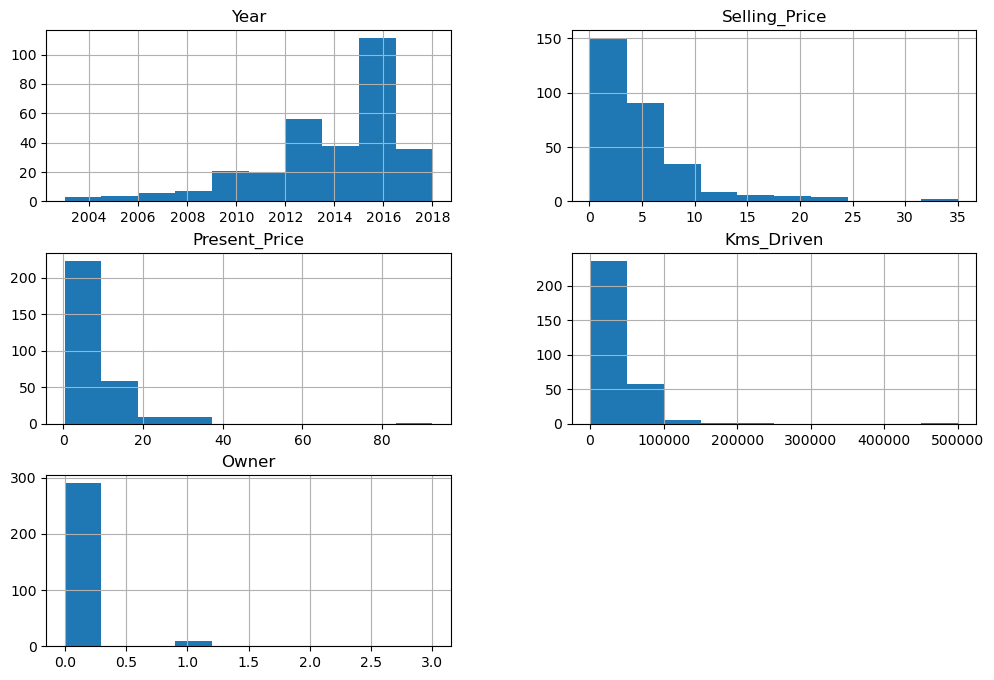

In [178]:

df.hist(figsize = (12,8))

In [179]:
df.describe() # stats of dataset numrical features

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [180]:
df.describe(include= 'object') # stats of catogirical features 

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


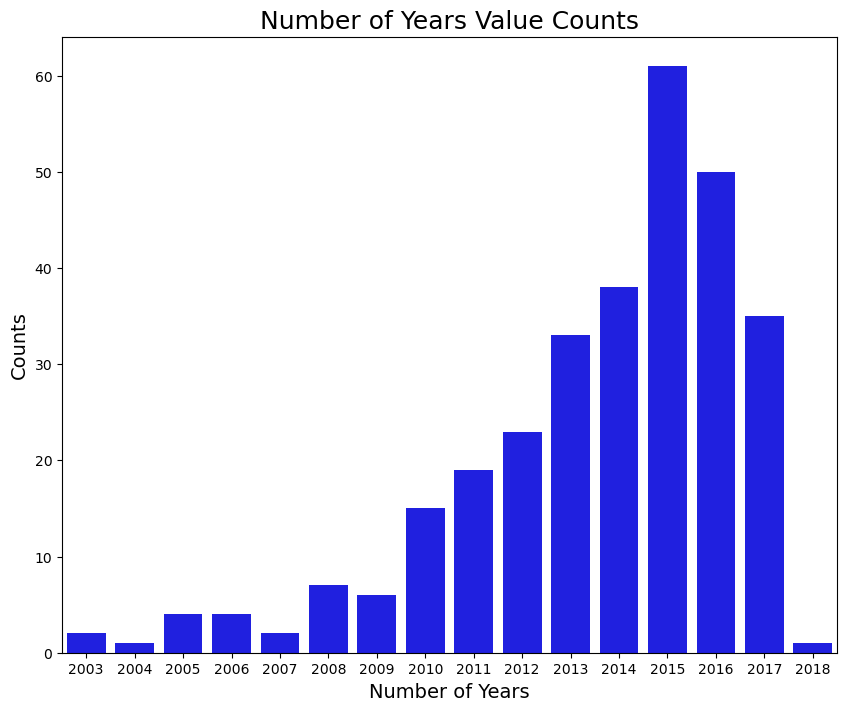

In [181]:
plt.figure(figsize=(10,8))
sns.countplot(data= df, x= 'Year', color = "blue")
plt.xlabel('Number of Years', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Number of Years Value Counts', fontsize=18)
# saving the file.Make sure you 
# use savefig() before show().
plt.savefig("years.png")
plt.show()

### Features modifications

In [182]:
df['Current_Year']= 2023 # to create age column

In [183]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


In [184]:
df['Age']= df['Current_Year']-df['Year']

In [186]:
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10


In [187]:
df.drop(df[['Year','Current_Year']], axis=1, inplace=True) # drop year and current year because i dont need them anymore

In [188]:
df.head(2) #  check my dataset

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10


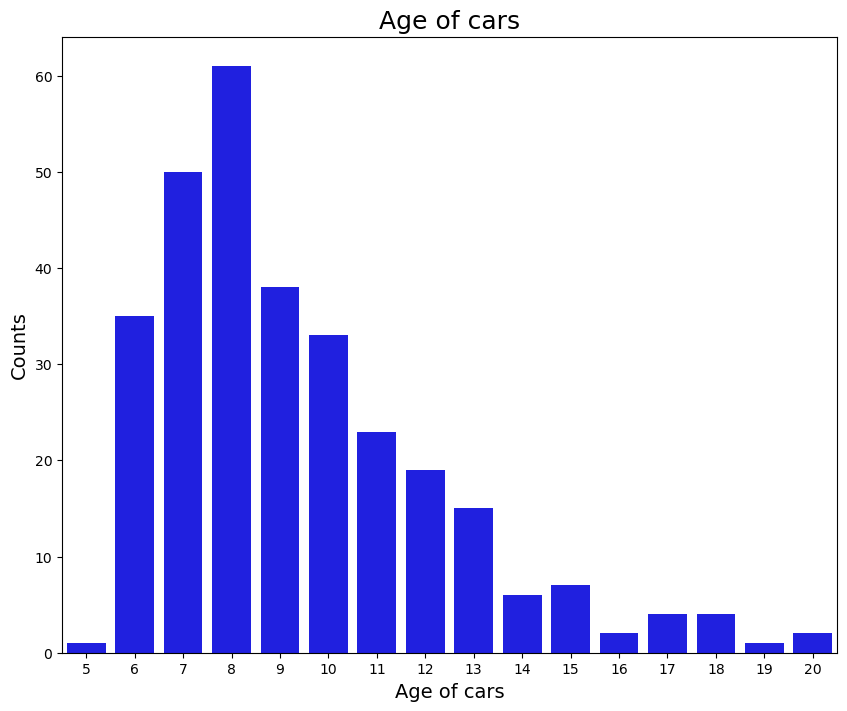

In [189]:
plt.figure(figsize=(10,8))
sns.countplot(data= df, x= 'Age', color = "blue")
plt.xlabel('Age of cars', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Age of cars', fontsize=18)
# saving the file.Make sure you 
# use savefig() before show().
plt.savefig("age.png")
plt.show()

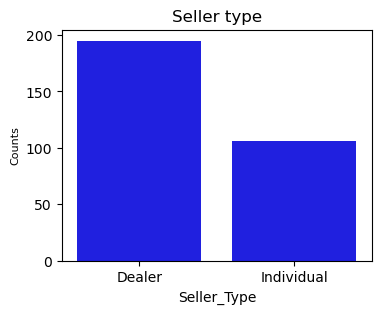

In [190]:
plt.figure(figsize=(4,3))
sns.countplot(data= df, x= 'Seller_Type', color = "blue")
#plt.xlabel('Number of Years', fontsize=14)
plt.ylabel('Counts', fontsize=8)
plt.title('Seller type', fontsize=12)
# saving the file. 
# then show
plt.savefig("sellers.png")
plt.show()

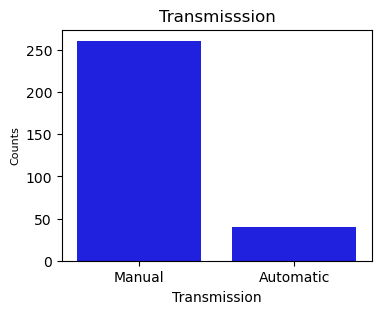

In [191]:
plt.figure(figsize=(4,3))
sns.countplot(x= df["Transmission"],  color = "blue")
#plt.xlabel('Number of Years', fontsize=12)
plt.ylabel('Counts', fontsize=8)
plt.title('Transmisssion', fontsize=12)
# saving the file. 
# then show
plt.savefig("transmissionss.png")
plt.show()

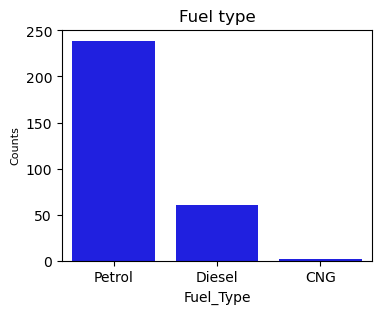

In [192]:
plt.figure(figsize=(4,3))
sns.countplot(x= df["Fuel_Type"],  color = "blue")
#plt.xlabel('Number of Years', fontsize=12)
plt.ylabel('Counts', fontsize=8)
plt.title('Fuel type', fontsize=12)
# saving the file. 
# then show
plt.savefig("fuels.png")
plt.show()

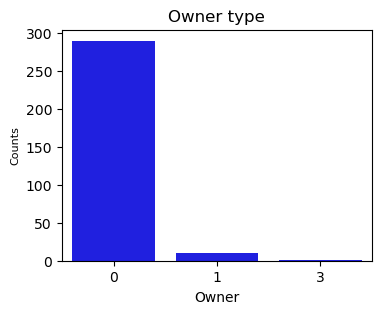

In [193]:
plt.figure(figsize=(4,3))
sns.countplot(x= df["Owner"],  color = "blue")
#plt.xlabel('Number of Years', fontsize=12)
plt.ylabel('Counts', fontsize=8)
plt.title('Owner type', fontsize=12)
# saving the file. 
# then show
plt.savefig("owners.png")
plt.show()

In [194]:
df.head(2)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10


In [195]:
popular_models = df['Car_Name'].value_counts()
h=popular_models[popular_models>=7]
h

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
Name: Car_Name, dtype: int64

In [125]:
best_cars = df.groupby(['Car_Name']).size().to_frame().sort_values([0], ascending=False).head(10).reset_index()

In [133]:
best_cars 


,Car_Name,0
0,city,26
1,corolla altis,16
2,verna,14
3,fortuner,11
4,brio,10
5,ciaz,9
6,innova,9
7,i20,9
8,grand i10,8
9,Royal Enfield Classic 350,7


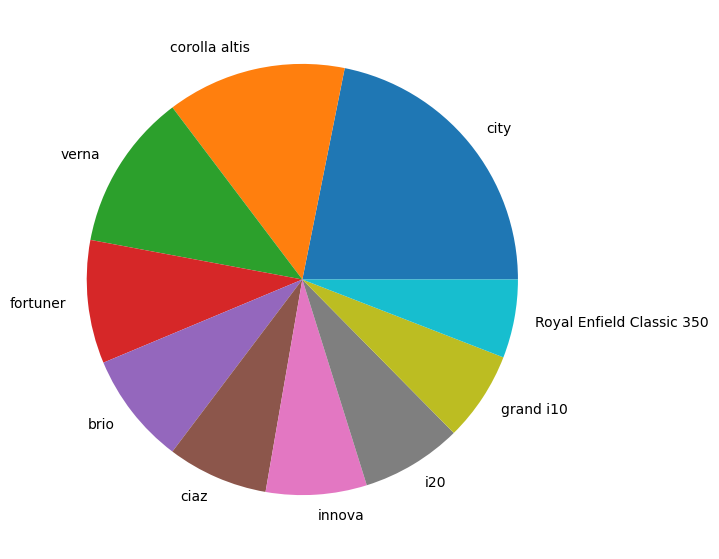

In [196]:
fig = plt.figure(figsize =(10, 7))
plt.pie(best_cars[0], labels = best_cars.Car_Name)
# saving the file. 

plt.savefig("carspie.png") 
# show plot

plt.show()

In [106]:
all_models = df['Car_Name'].value_counts()
all_models


city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [166]:
npopular_models = df['Car_Name'].value_counts()
n=npopular_models[npopular_models<=1]
n

Bajaj  ct 100               1
Hero  Ignitor Disc          1
TVS Jupyter                 1
Hero Honda Passion Pro      1
Hero Splender Plus          1
vitara brezza               1
Bajaj Discover 100          1
Suzuki Access 125           1
s cross                     1
alto 800                    1
baleno                      1
TVS Wego                    1
Hero  CBZ Xtreme            1
Hero Glamour                1
ignis                       1
Hero Super Splendor         1
800                         1
Hero Hunk                   1
Honda Activa 125            1
corolla                     1
Hero Honda CBZ extreme      1
Yamaha FZ 16                1
camry                       1
land cruiser                1
UM Renegade Mojave          1
Bajaj Dominar 400           1
KTM RC390                   1
Hyosung GT250R              1
KTM 390 Duke                1
Mahindra Mojo XT300         1
Bajaj Pulsar RS200          1
Royal Enfield Bullet 350    1
Bajaj Avenger 150           1
Bajaj Aven

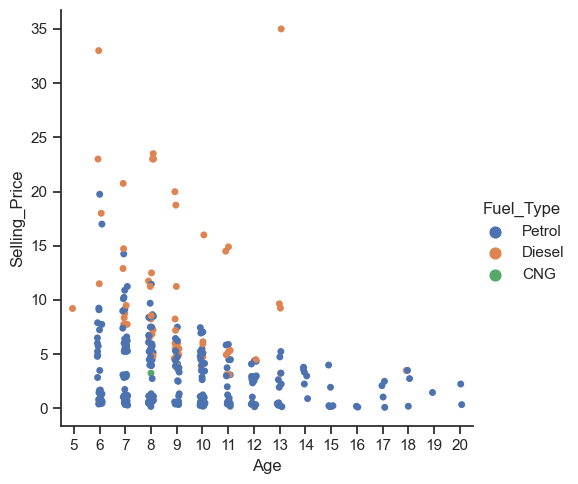

In [201]:
sns.set_theme(style="ticks")
g = sns.catplot(x="Age", y="Selling_Price", hue="Fuel_Type", data=df)
plt.rcParams["xtick.labelsize"] = 10
g.savefig('scatterplot.png')

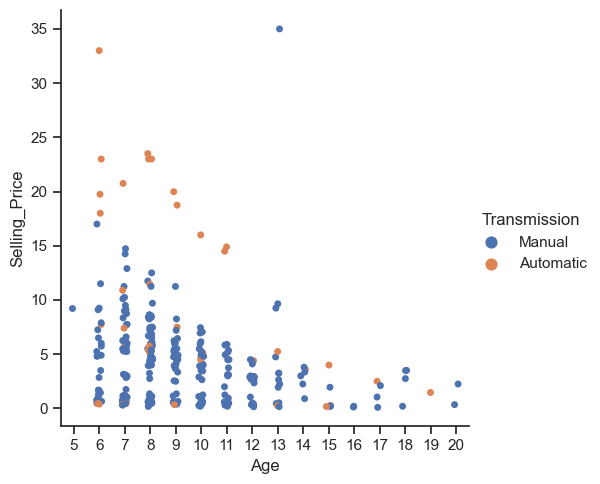

In [202]:
sns.set_theme(style="ticks")
g = sns.catplot(x="Age", y="Selling_Price", hue="Transmission", data=df)
plt.rcParams["xtick.labelsize"] = 10
g.savefig('price age ransmission.png')

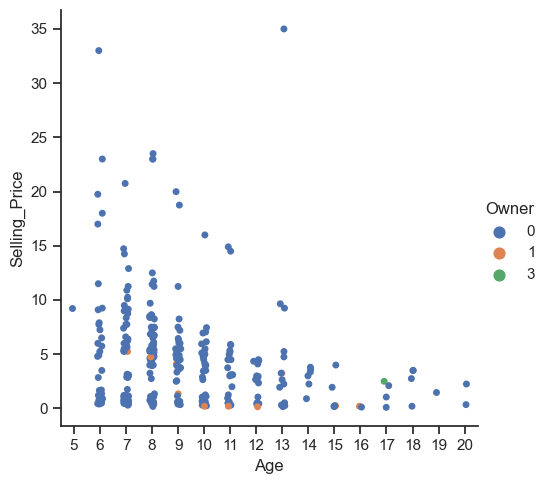

In [203]:
sns.set_theme(style="ticks")
g = sns.catplot(x="Age", y="Selling_Price", hue="Owner", data=df)
plt.rcParams["xtick.labelsize"] = 10
g.savefig('price age owner.png')

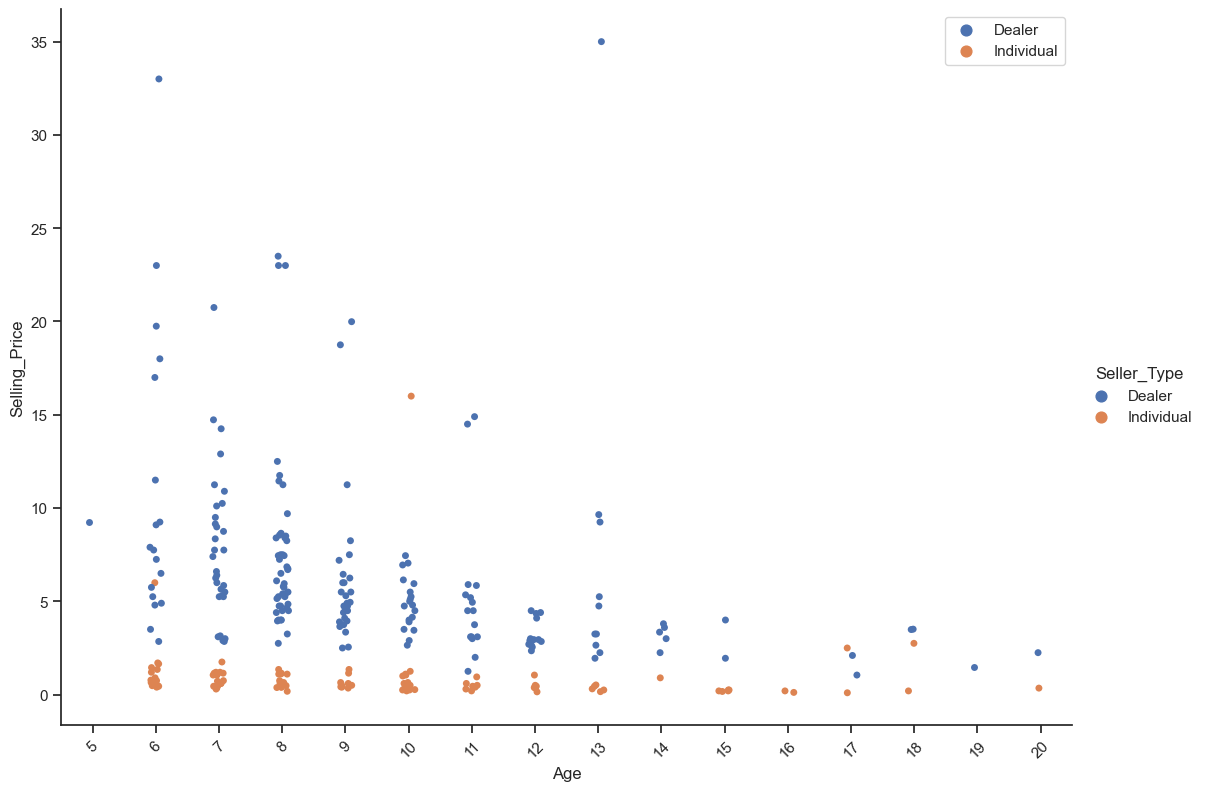

In [32]:
sns.set_theme(style="ticks")
g = sns.catplot(x="Age", y="Selling_Price", hue="Seller_Type", data=df,height=8, aspect=11/8)
g.set_xticklabels(rotation=45)
plt.legend()

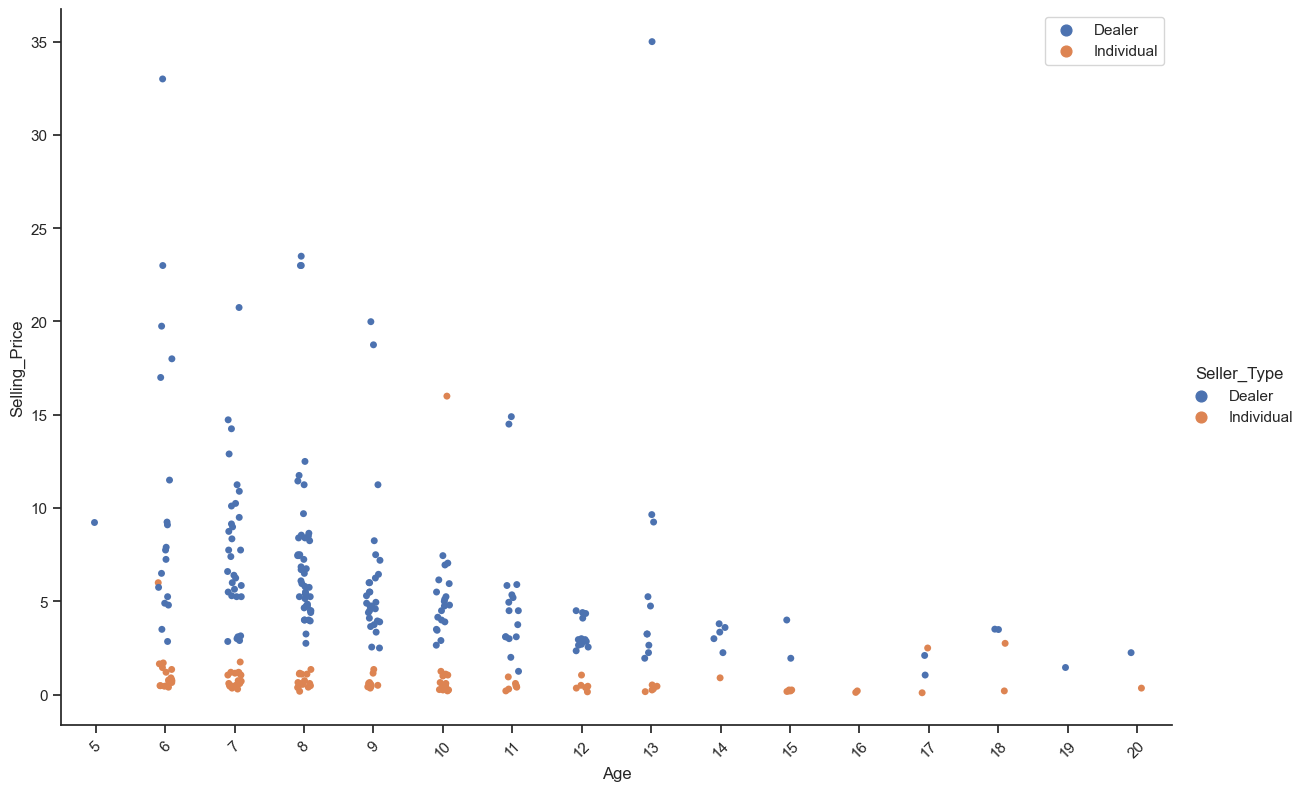

In [205]:
sns.set_theme(style="ticks")
g = sns.catplot(x="Age", y="Selling_Price", hue="Seller_Type", data=df, height=8, aspect=12/8)
g.set_xticklabels(rotation=45)
plt.legend()
g.savefig('price age seller.png')

In [36]:
dfq=df

## Features engineering with pandas dummies

In [37]:

dfq = pd.get_dummies(df, prefix=['Fuel'], columns=['Fuel_Type'])
dfq.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Age,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
0,ritz,3.35,5.59,27000,Dealer,Manual,0,9,0,0,1
1,sx4,4.75,9.54,43000,Dealer,Manual,0,10,0,1,0
2,ciaz,7.25,9.85,6900,Dealer,Manual,0,6,0,0,1
3,wagon r,2.85,4.15,5200,Dealer,Manual,0,12,0,0,1
4,swift,4.60,6.87,42450,Dealer,Manual,0,9,0,1,0


In [38]:
dfq2 = pd.get_dummies(df, prefix=['Seller'], columns=['Seller_Type'])
dfq2

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission,Owner,Age,Seller_Dealer,Seller_Individual
0,ritz,3.35,5.59,27000,Petrol,Manual,0,9,1,0
1,sx4,4.75,9.54,43000,Diesel,Manual,0,10,1,0
2,ciaz,7.25,9.85,6900,Petrol,Manual,0,6,1,0
3,wagon r,2.85,4.15,5200,Petrol,Manual,0,12,1,0
4,swift,4.60,6.87,42450,Diesel,Manual,0,9,1,0
...,...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Manual,0,7,1,0
297,brio,4.00,5.90,60000,Petrol,Manual,0,8,1,0
298,city,3.35,11.00,87934,Petrol,Manual,0,14,1,0
299,city,11.50,12.50,9000,Diesel,Manual,0,6,1,0


### Correlation of Dataset

In [132]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,2.0,0.0,1.0,0,9
1,sx4,4.75,9.54,43000,1.0,0.0,1.0,0,10
2,ciaz,7.25,9.85,6900,2.0,0.0,1.0,0,6
3,wagon r,2.85,4.15,5200,2.0,0.0,1.0,0,12
4,swift,4.60,6.87,42450,1.0,0.0,1.0,0,9


In [232]:

oe=OrdinalEncoder()
oe.fit(df[["Fuel_Type", "Seller_Type", "Transmission"]])
df[["Fuel_Type", "Seller_Type", "Transmission"]] = oe.transform(df[["Fuel_Type", "Seller_Type", "Transmission"]])
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,2.0,0.0,1.0,0,9
1,sx4,4.75,9.54,43000,1.0,0.0,1.0,0,10
2,ciaz,7.25,9.85,6900,2.0,0.0,1.0,0,6
3,wagon r,2.85,4.15,5200,2.0,0.0,1.0,0,12
4,swift,4.60,6.87,42450,1.0,0.0,1.0,0,9
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,1.0,0.0,1.0,0,7
297,brio,4.00,5.90,60000,2.0,0.0,1.0,0,8
298,city,3.35,11.00,87934,2.0,0.0,1.0,0,14
299,city,11.50,12.50,9000,1.0,0.0,1.0,0,6


In [46]:
Corr_Mat = df.corr(method="pearson")
Corr_Mat

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
Selling_Price,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510,0.089216,0.524342
Fuel_Type,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466,0.055705,0.053643
Seller_Type,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240,0.124269,0.039896
Transmission,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000,-0.050316,-0.000394
Owner,-0.088344,0.008057,0.089216,0.055705,0.124269,-0.050316,1.000000,0.182104
Age,-0.236141,0.047584,0.524342,0.053643,0.039896,-0.000394,0.182104,1.000000


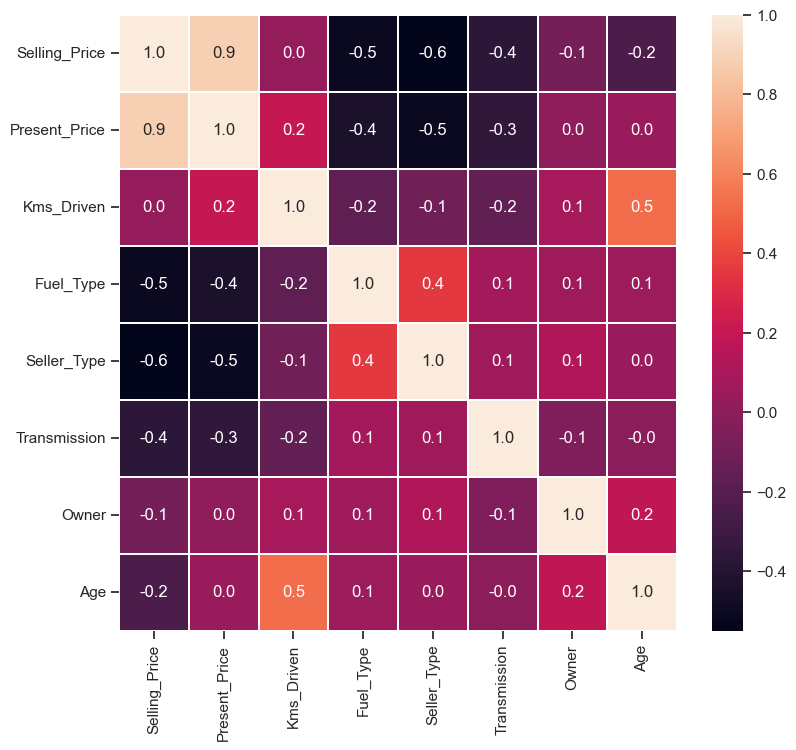

In [206]:
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(Corr_Mat, annot=True,linewidths = 0.1, fmt=".1f")
#sns.heatmap(corrMatrix, annot=True, cmap=sns.diverging_palette(220, 20, n=20))
#plt.rcParams["xtick.labelsize"] = 10
f.savefig('correlation.png')
#plt.show()

### Relation between Selleing price and Age

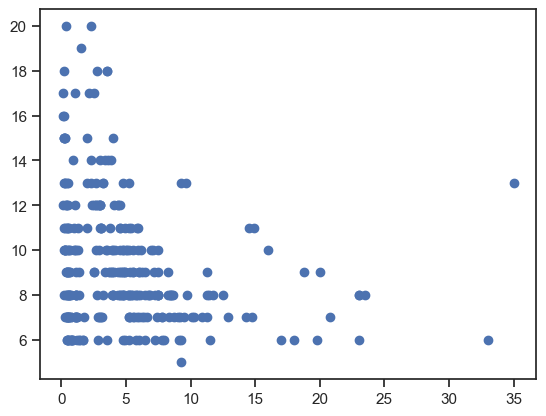

In [207]:
plt.scatter('Selling_Price', 'Age', data=df)
# saving the file. 
# then show
plt.savefig("selling age corr.png")

### Relation between Selleing price and Fuel type

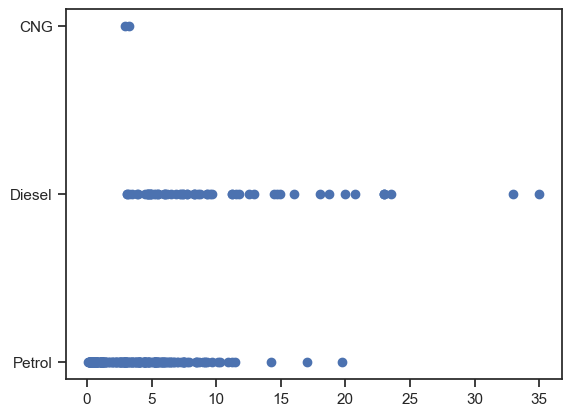

In [208]:
plt.scatter('Selling_Price', 'Fuel_Type', data=df)
# saving the file. 
# then show
plt.savefig("selling fuel corr.png")

### Relation between Selleing price and Transmisssion

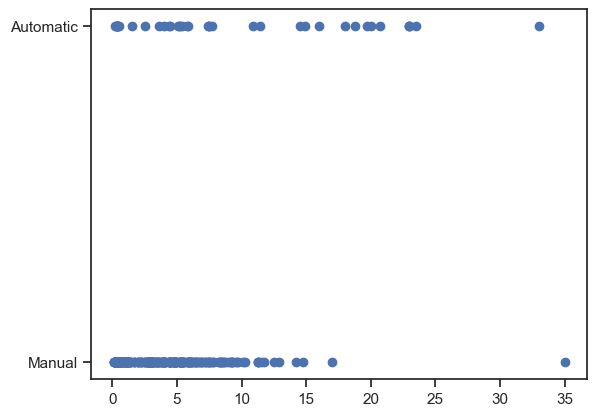

In [209]:
plt.scatter('Selling_Price', 'Transmission', data=df)
# saving the file. 
# then show
plt.savefig("selling transmisssion corr.png")

### Relation between Selleing price and seller type

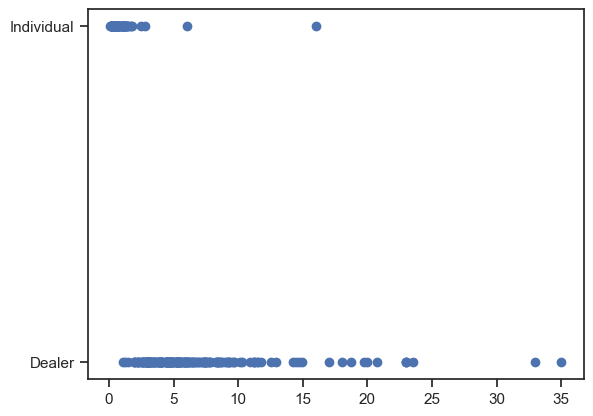

In [210]:
plt.scatter('Selling_Price', 'Seller_Type', data=df)
# saving the file. 
# then show
plt.savefig("selling type corr.png")

### Relation between Selleing price and km_driven 

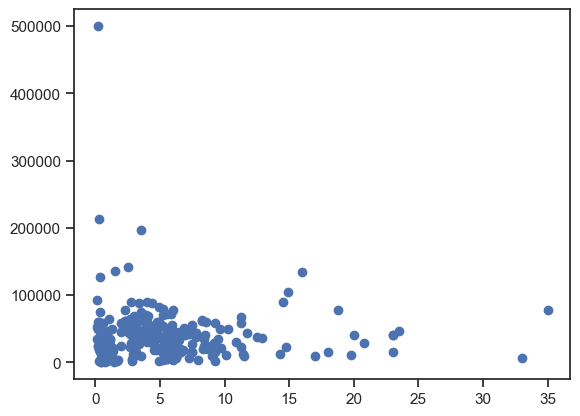

In [211]:
plt.scatter('Selling_Price', 'Kms_Driven', data=df)
# saving the file. 
# then show
plt.savefig("selling km corr.png")

### Relation between Selleing price and Present price

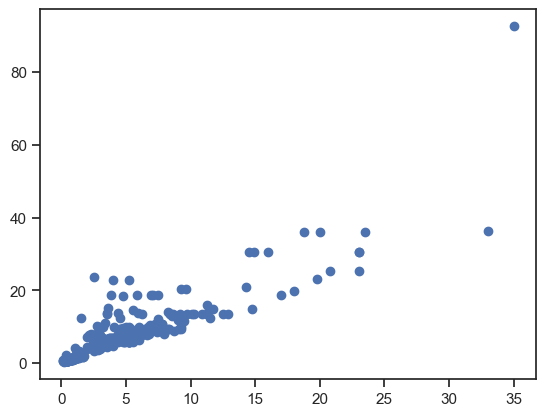

In [212]:
plt.scatter('Selling_Price', 'Present_Price', data=df)
# saving the file. 
# then show
plt.savefig("selling present corr.png")

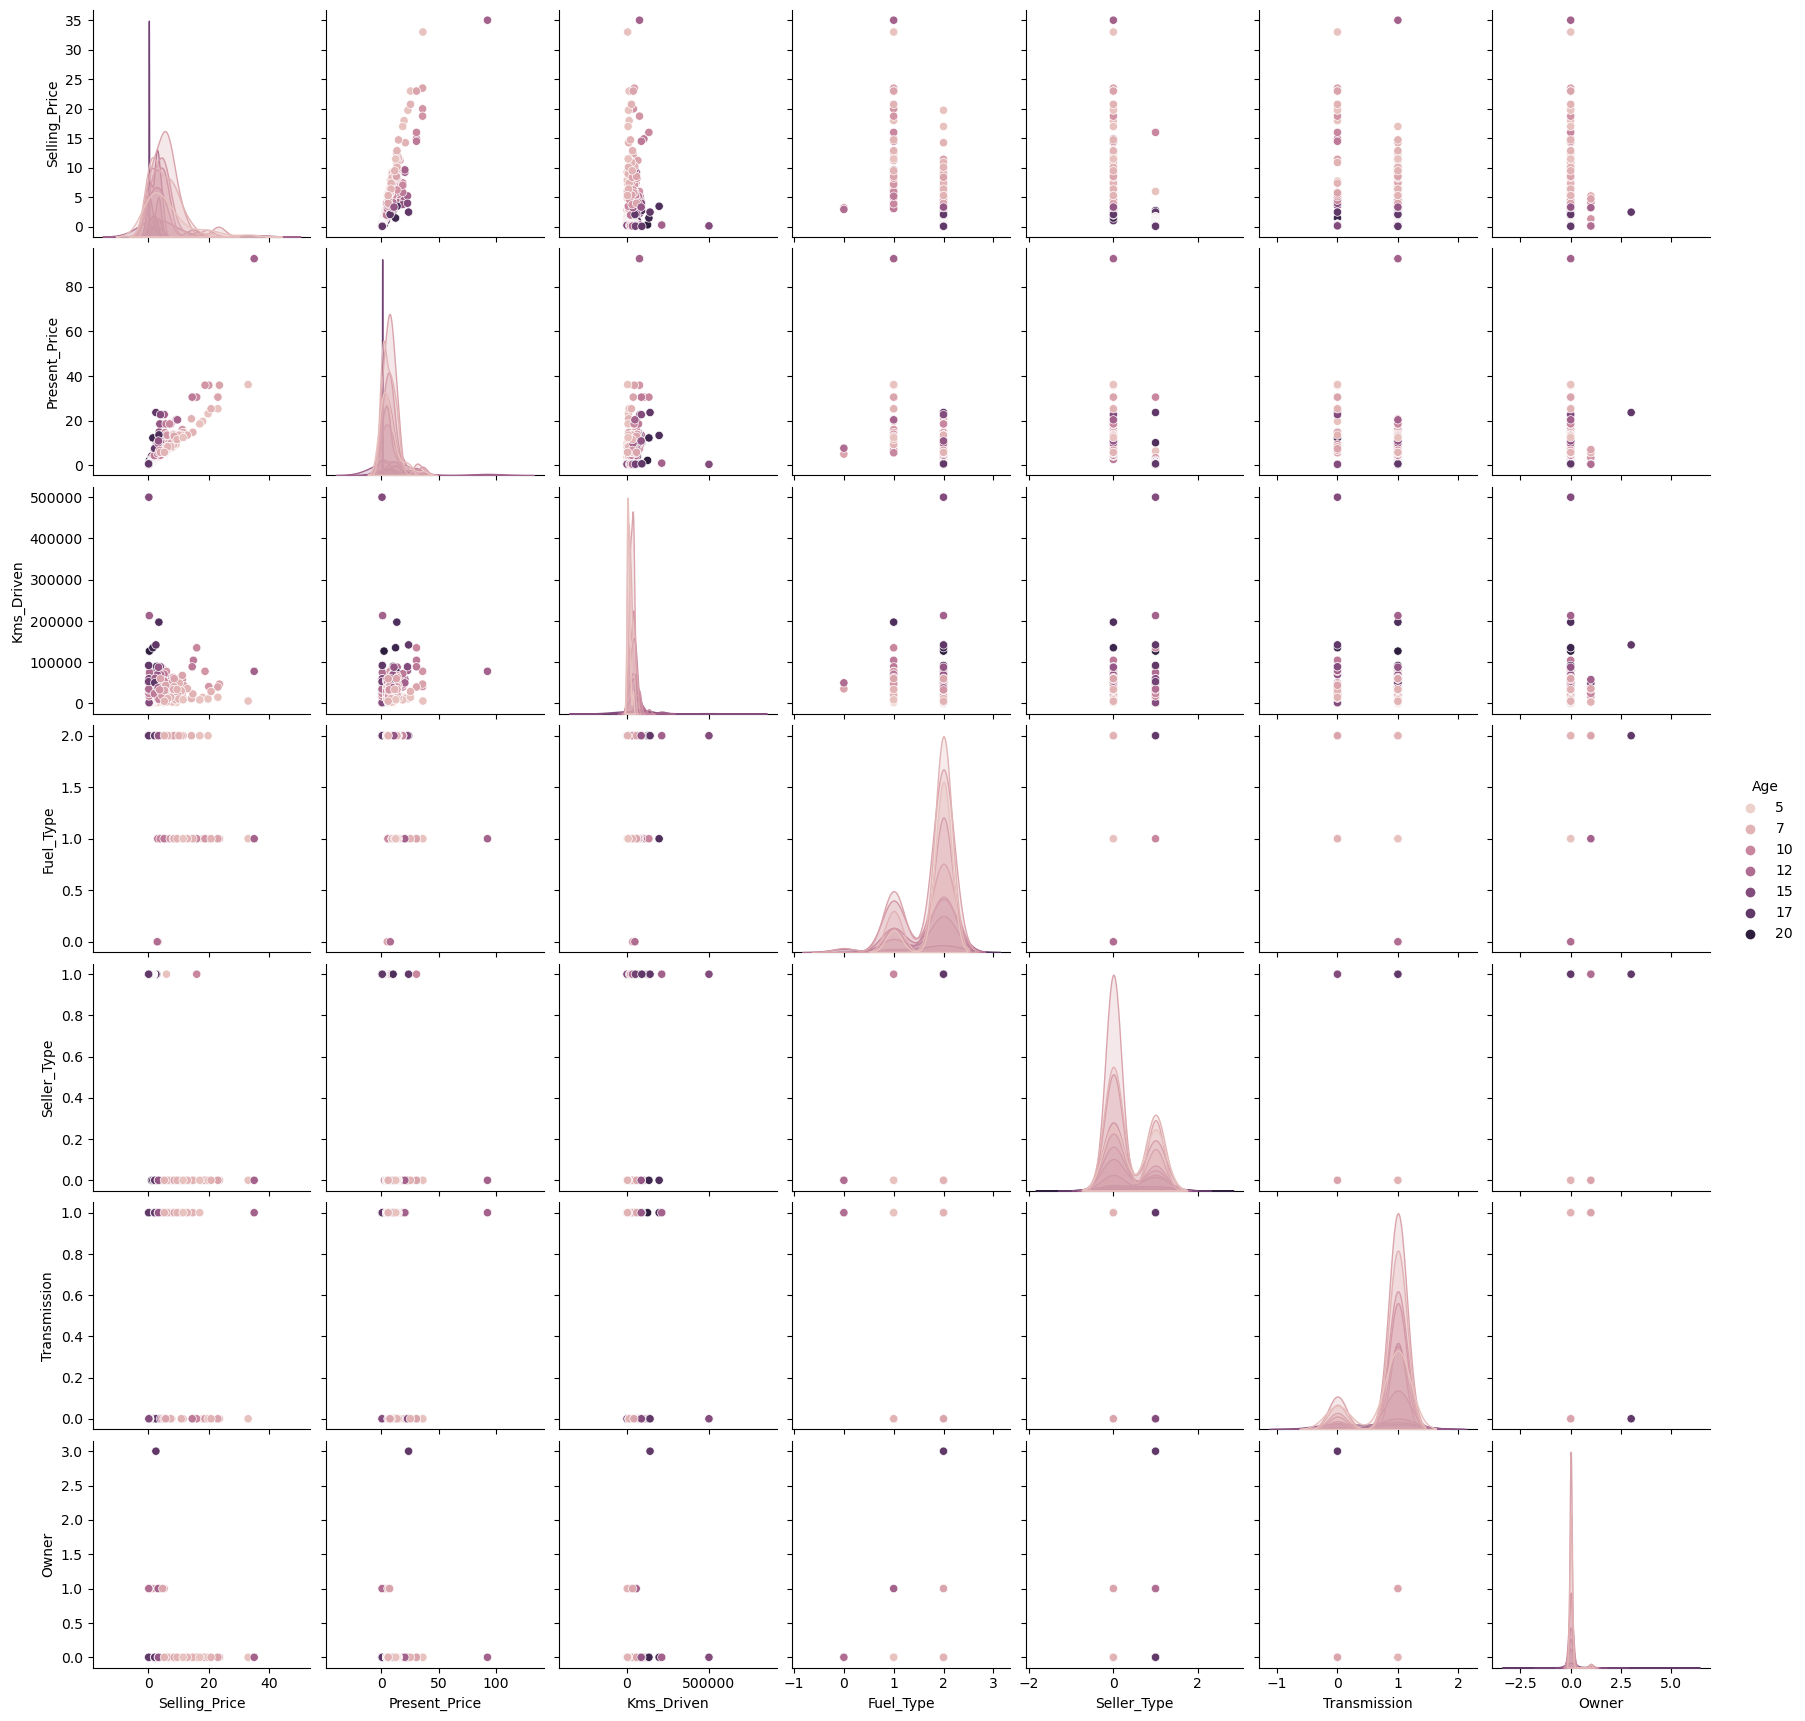

In [54]:
sns.pairplot(data= df, hue= 'Age', diag_kind= 'kde')

### Linear Regression  with Scipy.


In [215]:
X = df.Age
y = df.Selling_Price

LinregressResult(slope=-0.41509169463553913, intercept=8.551573656368292, rvalue=-0.23614098016042734, pvalue=3.495472434809122e-05, stderr=0.09878197293762839, intercept_stderr=0.9687154552454569)
slope: -0.415092   intercept: 8.551574
R-squared: 0.055763


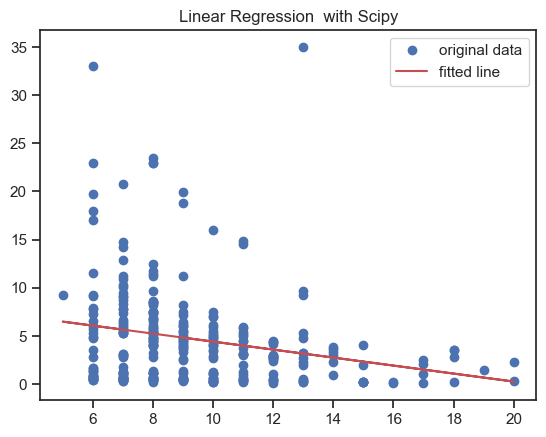

In [217]:
res = stats.linregress(df.Age, df.Selling_Price)
plt.plot(df.Age, df.Selling_Price, 'o', label='original data')
print(res)
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
print("slope: %f   intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
plt.plot(df.Age, res.intercept + res.slope*df.Age, 'r', label='fitted line')
plt.legend()
plt.title("Linear Regression  with Scipy")
# saving the file. 
# then show
plt.savefig("scipy reg.png")
plt.show()

### Linear Regression  with NumPy.

model =  [-0.41509169  8.55157366]
test predict age 7 =  5.645931793919517
r2 score =  0.05576256251112732


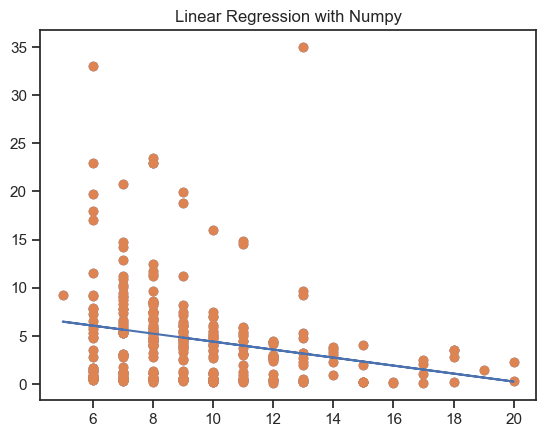

In [218]:
X = df.Age
y = df.Selling_Price
plt.scatter(X,y)
model = np.polyfit(X, y, 1)
print("model = ", model)
predict = np.poly1d(model)
test_age = 7
print("test predict age 7 = ", predict(test_age))
print("r2 score = ", r2_score(y, predict(X)))
x_lin_reg = X
y_lin_reg = predict(x_lin_reg)
plt.scatter(X, y)
plt.plot(x_lin_reg, y_lin_reg, c = 'b')
plt.title("Linear Regression with Numpy")
# saving the file. 
# then show
plt.savefig("numpy reg.png")

### Linear Regression with Sklearn.

In [220]:
#X = ['Age']
X_univariate = df["Age"].values.reshape(-1, 1)

#X_univariate = pd.DataFrame(np.c_[df['Age']], columns = ['Age'])
y_univariate = df['Selling_Price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_univariate, y_univariate, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 1)
(61, 1)
(240,)
(61,)


In [221]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)




In [222]:
print("slope: %f   intercept: %f" % (model.coef_, model.intercept_))

slope: -0.392143   intercept: 8.300660


In [223]:
print("R-squared: %f" %model.score(X_test, y_test))

R-squared: 0.088382


In [224]:

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(f"RMSE: {rmse:.2f}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

R-squared: 0.09
RMSE: 4.58
MAE: 3.20


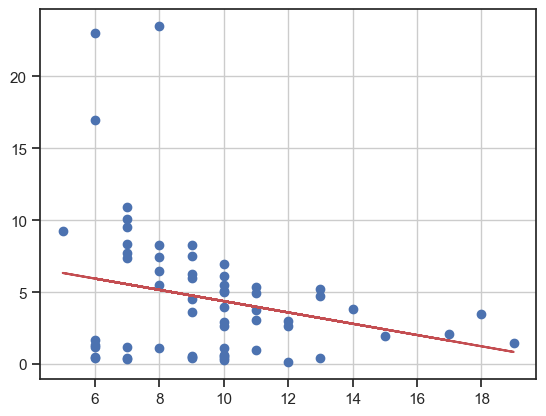

In [225]:
y_pred = model.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='r')
plt.grid()
# saving the file. 
# then show
plt.savefig("sklearn one feature reg.png")
plt.show()

C:\Users\mznha\AppData\Local\Temp\ipykernel_1692\1220137653.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


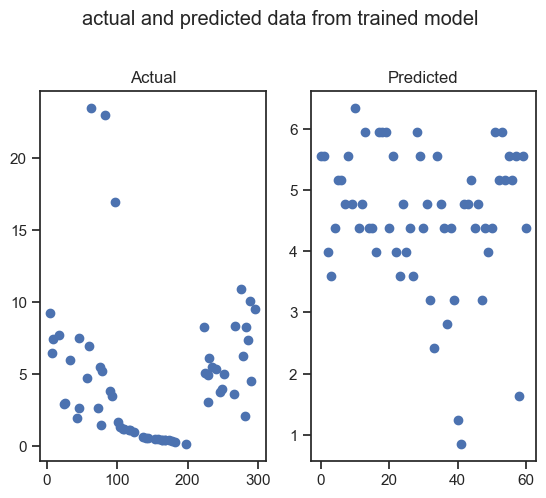

In [226]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(y_test, linestyle='none', marker ='o')
ax1.set_title('Actual')
ax2.plot(y_pred, linestyle='none', marker ='o')
ax2.set_title('Predicted')
fig.suptitle('actual and predicted data from trained model', y=1.05)
# saving the file. 
# then show
plt.savefig("comparison regre.png")
fig.show()

### Model with multiple features

In [234]:
X = pd.DataFrame(df, columns=['Age', 'Kms_Driven', 'Transmission'])

In [235]:
X = np.array(X)
y = np.array(df['Selling_Price'])

In [236]:
y.shape

(301,)

In [237]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [238]:
model2 = LinearRegression() 
model2.fit(X_train, y_train)

LinearRegression()

In [239]:
print("R-squared: %f" %model2.score(X_test, y_test))

R-squared: 0.145846


In [240]:
#Prdict : Prix pour un véhicule ayant moins de 7 ans, pas plus de 100 000 km, avec une boite manuelle
X_test = np.array([6, 99999, 1]).reshape(1, -1)
model2.predict(X_test)

array([6.51934075])

In [241]:

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(f"RMSE: {rmse:.2f}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

R-squared: -0.03
RMSE: 3.98
MAE: 3.22


In [242]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

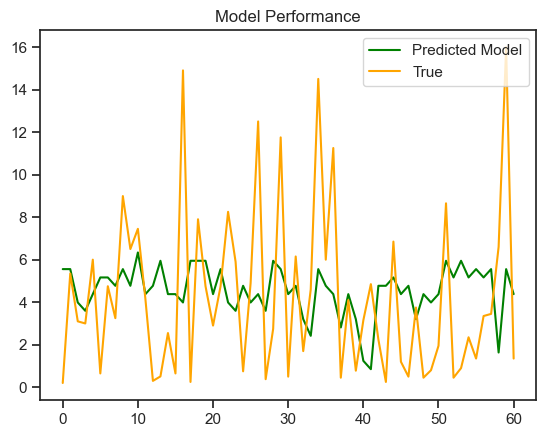

In [244]:
plt.title('Model Performance')

plt.plot(list(y_pred)[:250], label='Predicted Model', color="green")
plt.plot(list(y_test)[:250], label='True', color="orange")
plt.legend()
# saving the file. 
# then show
plt.savefig("predict and true model.png")

In [245]:
class LinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        # Add a column of ones to the input data
        X = np.c_[np.ones(len(X)), X]

        # Use the normal equation to estimate the model parameters
        self.coef_, self.intercept_ = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        # Add a column of ones to the input data
        X = np.c_[np.ones(len(X)), X]

        # Use the model parameters to make predictions
        return X @ np.r_[self.intercept_, self.coef_]

    def score(self, X, y):
        y_pred = self.predict(X)
        mse = mean_squared_error(y, y_pred)
        return 1 - mse / np.var

In [246]:
LR = LinearRegression()
LR.fit(X_train, y_train)

ValueError: too many values to unpack (expected 2)